# Chapter 4

<a target="_blank" href="https://colab.research.google.com/github/CausalAILab/causalai-book/blob/main/ch4 (part 1).ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# !pip install toposort pydash

In [2]:
import os
import sys

if 'google.colab' in sys.modules:
    os.system("git clone https://github.com/CausalAILab/causalai-book.git")
    os.system("mv causalai-book/* ./")
    os.system("rm -rf causalai-book")

In [3]:
# Importing the necessary libraries and modules for causal inference
from src.fusion import *

from src.graph.classes.graph import Graph
from src.inference.utils.graph_utils import GraphUtils as gu

from src.inference.classes.causal_query import CausalQuery

from src.inference.engines.backdoor_engine import BackdoorEngine
from src.adjustment.backdoor_adjustment import BackdoorAdjustment as BD

from src.utils import plot_causal_diagram

from src.inference.utils.expression_utils import ExpressionUtils as eu
from IPython.display import display, Latex

## Definition 4.2.2 - Back-door Criterion

Let $G$ be a causal diagram and $\mathbf X$ and $\mathbf Y$ be the sets of treatment and outcome variable, respectively. A set of variables $\mathbf Z$ is said to satisfy the back-door criterion (BDC) relative to the pair $(\mathbf X, \mathbf Y)$ in $G$ if:

1. No node in $\mathbf Z$ is a descendant of $\mathbf X$, and 
2. $\mathbf Z$ blocks every path between $\mathbf X$ and $\mathbf Y$ that contains an arrow into $\mathbf X$.

### Theorem 4.2.5 - Conditional Back-door Adjustment

Let $G$ be a causal diagram and $\mathbf X, \mathbf Y, \mathbf W$ be the sets of treatment, outcomes, and covariates variables, respectively. If a set of variables $\mathbf Z \cup \mathbf W$ satisfies the back-door criterion relative to the pair $(\mathbf X, \mathbf Y)$, then the $\mathbf W$-specific effect of $\mathbf X$ on $\mathbf Y$ is identifiable and given by:

\begin{equation}
P(\mathbf y | do(\mathbf x), \mathbf w) = \sum_{\mathbf z} P(\mathbf y | \mathbf x, \mathbf z, \mathbf w) P(\mathbf z | \mathbf w)
\end{equation}

### Example 4.4

Consider a study of the results achieved by high school students on their SAT exams. Consider the causal diagram constructed below and suppose $Z_1$ represents
the school district of the student, $Z_2$ the monthly income of her family, and $X$ the type of school
they are currently attending (e.g., public, charter, private, boarding), and $Y$ the results obtained by
the student in the SAT exam.


Suppose the administration of district z1 is considering whether to increase funding for the
charter program, and, therefore, aim to evaluate what is the effect of this type of schools in the
 students SAT results. In formal notation, the query can be written as $P(y | do(x),Z_1 = z_1)$.


In [4]:
G4 = '''
<NODES>
X
Y
Z1
Z2

<EDGES>
Z1 -> X
Z2 -> Z1
Z2 -> Y
X -> Y
Z1 -- Z2
X -- Z1
'''

In [5]:
G = parseGraph(G4)

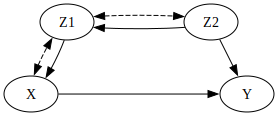

In [6]:
plot_causal_diagram(G, node_positions={'X': (0, 0), 'Y': (3, 0), 'Z1': (0.5, 1), 'Z2': (2.5, 1)})

In [7]:
X = gu.getNodesByName(['X'], G)
Y = gu.getNodesByName(['Y'], G)
Z = gu.getNodesByName(['Z1'], G)

In [8]:
bd_sets = BD.listAdmissibleSets(G, X, Y, Z)

In [9]:
engine = BackdoorEngine()
q4 = CausalQuery(X, Y, Z)

In [10]:
result = engine.compute(q4, G)

In [11]:
exp = eu.write(result)
display(Latex(f'${exp}$'))

<IPython.core.display.Latex object>